In [1]:
import pandas as pd

学习目标
- 掌握描述性数据分析流程
- 能够使用pandas、seaborn进行数据分析和可视化

# 案例介绍

案例背景：

- 数据集中包含了不同城市优衣库门店的销售记录
- 通过对销售数据的分析，为运营提供一些有益信息

分析需求：

- 不同产品的销售情况，顾客喜欢的购买方式
- 销售额和成本之间的关系
- 购买时间偏好- 

In [2]:
# 数据集说明：

# 本案例使用 uniqlo.csv 数据集，其数据字段如下：

# 字段  说明
# store_id  门店随机id
# city  城市
# channel  销售渠道：网购自提、门店购买
# gender_group  客户性别：男、女
# age_group  客户年龄段
# wkd_ind  购买发生的时间：周末、周间
# product  产品类别
# customer  客户数量
# revenue  销售金额
# order  订单数量
# quant  购买产品的数量
# unit_cost  成本（制作+运营）

# 加载数据

## 加载 uniqlo.csv 数据，并查看数据的基本情况

In [3]:
uniqlo = pd.read_csv('./data/uniqlo.csv')
uniqlo

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
22288,146,杭州,线下,Female,30-34,Weekday,短裤,1,80.0,1,2,19
22289,430,成都,线下,Female,25-29,Weekend,T恤,1,79.0,1,1,49
22290,449,武汉,线下,Female,35-39,Weekday,T恤,1,158.0,1,2,49
22291,758,杭州,线下,Female,20-24,Weekday,袜子,1,26.0,1,1,9


In [4]:
# 查看数据字段信息
uniqlo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      22293 non-null  int64  
 1   city          22293 non-null  object 
 2   channel       22293 non-null  object 
 3   gender_group  22293 non-null  object 
 4   age_group     22293 non-null  object 
 5   wkd_ind       22293 non-null  object 
 6   product       22293 non-null  object 
 7   customer      22293 non-null  int64  
 8   revenue       22293 non-null  float64
 9   order         22293 non-null  int64  
 10  quant         22293 non-null  int64  
 11  unit_cost     22293 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


In [5]:
# 结果说明：从上面结果中看出，数据没有缺失

In [6]:
# 查看数据字段的统计信息
uniqlo.describe()

,store_id,customer,revenue,order,quant,unit_cost
count,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,335.391558,1.629480,159.531371,1.651998,1.858072,46.124658
std,230.236167,1.785605,276.254066,1.861480,2.347301,19.124347
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000
25%,142.000000,1.000000,64.000000,1.000000,1.000000,49.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000


In [7]:
# 查看销售金额小于1的数据信息
uniqlo[uniqlo.revenue<1]

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
77,231,广州,线下,Female,>=60,Weekend,毛衣,1,0.00,1,1,99
837,231,广州,线下,Female,40-44,Weekend,袜子,1,0.00,1,1,9
1137,336,西安,线下,Female,45-49,Weekend,当季新品,1,0.00,1,1,59
1405,231,广州,线下,Female,35-39,Weekday,当季新品,1,0.00,1,1,59
1411,231,广州,线下,Female,30-34,Weekend,当季新品,1,0.00,1,1,59
2475,336,西安,线下,Female,45-49,Weekend,T恤,1,0.00,1,1,49
2606,231,广州,线下,Female,20-24,Weekday,T恤,1,0.00,1,1,49
2863,231,广州,线下,Male,40-44,Weekend,当季新品,1,0.00,1,1,59
3479,231,广州,线下,Male,>=60,Weekend,牛仔裤,1,0.00,1,1,69
4168,231,广州,线下,Female,25-29,Weekend,袜子,1,0.00,1,1,9


In [8]:
# 结果说明：进一步查看之后发现，一部分订单收入为0，可能为赠品，收入小于0的订单只有一个，实际工作中可以跟业务方核对数据

In [9]:
# 查看销售金额大于5000的数据信息
uniqlo[uniqlo.revenue>5000]

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
3008,46,武汉,线下,Female,25-29,Weekend,当季新品,44,7919.00,48,48,59
4230,796,深圳,线下,Female,35-39,Weekday,当季新品,29,5122.00,30,31,59
6595,20,深圳,线下,Female,25-29,Weekday,当季新品,5,5947.00,5,30,59
9628,19,南京,线下,Female,45-49,Weekday,当季新品,42,12538.00,45,70,59
9699,437,重庆,线下,Female,35-39,Weekday,当季新品,58,10498.28,65,65,59
11769,19,南京,线下,Female,30-34,Weekday,当季新品,22,5771.00,22,29,59
12729,335,上海,线下,Female,50-54,Weekday,T恤,1,6636.00,4,84,49
15136,360,成都,线下,Female,30-34,Weekday,当季新品,38,6150.00,39,39,59
16309,146,杭州,线下,Female,25-29,Weekday,当季新品,45,8836.00,54,55,59
16331,50,武汉,线上,Female,20-24,Weekday,当季新品,32,5039.59,34,34,59


# 业务解读

## 不同产品的销售情况

### 统计不同种类产品的订单情况

In [10]:
# 统计不同种类产品的订单情况
uniqlo.groupby('product')['order'].sum().sort_values(ascending=False)

product
T恤      16792
当季新品     4835
配件       3983
袜子       2775
短裤       2375
牛仔裤      2292
运动       1538
毛衣       1258
裙子        980
Name: order, dtype: int64

In [11]:
# 结果说明：可以看出，T恤销售记录条数最多，其次是当季新品，袜子...

### 统计不同种类产品的销量

In [12]:
uniqlo.groupby('product')['quant'].sum().sort_values(ascending=False)

product
T恤      18425
当季新品     5338
配件       4622
袜子       3639
短裤       2821
牛仔裤      2432
运动       1794
毛衣       1356
裙子        995
Name: quant, dtype: int64

In [13]:
# 进一步拆解，按城市拆解销量
uniqlo.pivot_table(values='quant',
                  index='product',
                  columns='city',
                  aggfunc='sum').sort_values('上海',ascending=False)

city,上海,北京,南京,广州,成都,杭州,武汉,深圳,西安,重庆
product,,,,,,,,,,
T恤,2118,800,568,1681,1079,3100,2964,3697,1145,1273
当季新品,550,188,266,459,329,840,862,1126,281,437
配件,550,138,126,406,225,777,755,1046,260,339
袜子,370,123,117,379,240,662,568,735,186,259
牛仔裤,307,46,52,194,178,388,415,477,152,223
短裤,306,87,49,266,179,456,490,608,174,206
运动,171,31,17,174,125,351,282,364,118,161
毛衣,131,37,44,149,92,238,202,248,105,110
裙子,102,27,26,107,77,163,165,201,71,56


In [14]:
# 对城市拆解后，在进一步按线上线下拆解
uniqlo.pivot_table(values='quant',
                  index='product',
                  columns=['city','channel'],
                  aggfunc='sum')

city      上海         北京   南京    广州         成都    杭州    武汉          深圳   西安  \
channel   线上    线下   线下   线下    线上   线下    线下    线下    线上    线下    线下   线上   
product                                                                      
T恤       591  1527  800  568  1087  594  1079  3100  1366  1598  3697  120   
当季新品     177   373  188  266   273  186   329   840   328   534  1126   38   
毛衣        27   104   37   44    85   64    92   238   115    87   248    5   
牛仔裤       91   216   46   52   119   75   178   388   162   253   477   27   
短裤       116   190   87   49   172   94   179   456   267   223   608   28   
袜子       121   249  123  117   241  138   240   662   308   260   735   40   
裙子        34    68   27   26    44   63    77   163    62   103   201   17   
运动        42   129   31   17   107   67   125   351   103   179   364   25   
配件       194   356  138  126   259  147   225   777   530   225  1046   51   

city           重庆        
channel    线下  线上    线下  
product                  
T恤       1025  90  1183  
当季新品      243  50   387  
毛衣        100  16    94  
牛仔裤       125  16   207  
短裤        146  43   163  
袜子        146  26   233  
裙子         54   1    55  
运动         93  18   143  
配件        209  20   319

## 用户习惯使用哪种方式进行消费

### 统计使用不同消费方式的订单数量

In [15]:
uniqlo.groupby('channel').order.sum()

channel
线上     6823
线下    30005
Name: order, dtype: int64

In [16]:
# 结果说明：从数据中看出，线下消费记录更多，线上较少

In [17]:
# 进一步按城市拆解
uniqlo.pivot_table(index='city',columns='channel',
                  values='order',aggfunc='sum').sort_values('线上',ascending=False)

channel,线上,线下
city,,
武汉,2895.0,3101.0
广州,2115.0,1277.0
上海,1237.0,2800.0
西安,325.0,1954.0
重庆,251.0,2523.0
北京,NaN,1303.0
南京,NaN,1113.0
成都,NaN,2263.0
杭州,NaN,6196.0


In [18]:
# 结果说明：数据中发现，并不是所有的城市都有线下，有些城市线上订单数大于线下订单数，比如广州

In [19]:
#  进一步计算线上线下销售额
uniqlo.pivot_table(values='quant',index='city',
                  columns='channel',aggfunc='sum')

channel,线上,线下
city,,
上海,1393.0,3212.0
北京,NaN,1477.0
南京,NaN,1265.0
广州,2387.0,1428.0
成都,NaN,2524.0
杭州,NaN,6975.0
武汉,3241.0,3462.0
深圳,NaN,8502.0
西安,351.0,2141.0


In [20]:
# 结果说明：从结果中得出广州销售额线上>线下，武汉线上线下比较接近，北京、南京、成都、杭州、深圳没有线上

## 用户消费习惯(周间还是周末)

### 统计用户周间、周末消费的整体情况

In [21]:
# 统计用户周间，周末消费的整体情况
uniqlo.wkd_ind.value_counts()

Weekday    12465
Weekend     9828
Name: wkd_ind, dtype: int64

In [22]:
# 结果说明：整体情况上看，周间数据条目数量>周末数量，但周间有5天，所以整体看周末日均销售情况好于周间

### 通过数据透视表，查看不同城市周间、周末销量情况

In [23]:
wkd_sales = uniqlo.pivot_table(values='quant',index='wkd_ind',
                              columns='city',aggfunc='sum')
wkd_sales

city,上海,北京,南京,广州,成都,杭州,武汉,深圳,西安,重庆
wkd_ind,,,,,,,,,,
Weekday,2637,869,818,2318,1552,4169,4013,4993,1399,1778
Weekend,1968,608,447,1497,972,2806,2690,3509,1093,1286


In [24]:
# 添加字段，计算每天的销售额
wkd_sales.loc['weekday_avg',:] = wkd_sales.loc['Weekday',:]/5
wkd_sales.loc['weekday_avg',:] = wkd_sales.loc['Weekday',:]/2
wkd_sales

city,上海,北京,南京,广州,成都,杭州,武汉,深圳,西安,重庆
wkd_ind,,,,,,,,,,
Weekday,2637.0,869.0,818.0,2318.0,1552.0,4169.0,4013.0,4993.0,1399.0,1778.0
Weekend,1968.0,608.0,447.0,1497.0,972.0,2806.0,2690.0,3509.0,1093.0,1286.0
weekday_avg,1318.5,434.5,409.0,1159.0,776.0,2084.5,2006.5,2496.5,699.5,889.0


In [25]:
# 结果说明：可以看出每个城市周间周末平均消费订单数量的情况

## 销售额和成本之间的关系

### 销售额 revenue 和 unit_cost 成本之间的关系，先直接计算皮尔逊相关系数

In [26]:
# 计算销售额和成本之间的相关系数
uniqlo[['revenue','unit_cost']].corr()

,revenue,unit_cost
revenue,1.00000,0.14844
unit_cost,0.14844,1.00000


In [27]:
# 结果说明：从结果中查看发现，貌似没有关系

In [28]:
# 进一步查看unit_cost
uniqlo.unit_cost.value_counts()

49    11586
59     3169
9      2053
19     1694
29     1572
69     1412
99      807
Name: unit_cost, dtype: int64

In [29]:
# 结果说明：查看发现 unit_cost 为单位商品的成本，但是 revenue 不一定是一件物品的收入，需要处理数据

In [30]:
uniqlo2 = uniqlo[uniqlo.revenue > 1]
uniqlo2.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9


In [31]:
# 添加单位收入列，并计算单间收入和单位成本计算相似度
uniqlo2['rev_per_goods'] = uniqlo2['revenue'] / uniqlo2['quant']
uniqlo2[['rev_per_goods','unit_cost']].corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_14192\776331257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniqlo2['rev_per_goods'] = uniqlo2['revenue'] / uniqlo2['quant']


,rev_per_goods,unit_cost
rev_per_goods,1.000000,0.503499
unit_cost,0.503499,1.000000


In [32]:
import seaborn as sns

<AxesSubplot: >

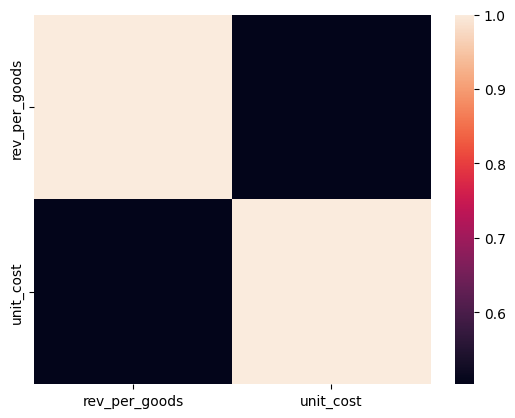

In [33]:
# 绘制热力图
sns.heatmap(uniqlo2[['rev_per_goods','unit_cost']].corr())

# 总结
- 数据分析的过程中，多维度拆解是很重要的分析思路，在分析产品销售情况的时候，案例中分别按城市，按线上线下进行拆解，实际上还可以从更多的维度进行拆解，比如年龄、性别等均可以拆解，拆解之后可以获得更多信息
- 使用seaborn进行可视化代码比较简洁,还自带了简单的统计功能，比如countplot
- 透视表(pivot_table)和分组聚合(groupby aggragation)功能类似，都可以从不同角度来观察数据